### 0. 데이터프레임 불러오기

In [4]:
import pandas as pd
import io

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
filename = '/content/drive/MyDrive/join.csv'

In [7]:
pd.read_csv(filename)

,거래일자,시도명,시군구명,읍면동명,상품명,온누리상품대분류카테고리명,온누리상품중분류카테고리명,온누리상품소분류카테고리명,상품판매수량,상품판매단가,Birth,Gender
0,20190718,서울,강북구,번동,아미큐파워란트제타토닉세트,NaN,NaN,미분류상품,1,10000,1950,남
1,20190807,서울,강북구,번동,아셀치온,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,베타카로틴/비타민E/셀레늄,2,60000,1980,여
2,20190905,경기,수원시 영통구,영통1동,바세린퓨어스킨젤리오리지날,퍼스널케어,바디/핸드케어,로션/크림/오일,1,2000,1970,여
3,20191002,경기,수원시 영통구,영통1동,비오킬버그프리미니,리빙,생활용품,해충·방충·모기기피제,1,6000,1990,여
4,20190130,경기,수원시 영통구,영통1동,닥터폴리Y자형가정용치실,퍼스널케어,오랄케어,치간칫솔/치실,1,7000,1980,여
5,20191112,경기,수원시 영통구,영통1동,비맥스메타정,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,종합비타민/비타민B/비타민C,1,70000,1970,남
6,20191228,경기,고양시 덕양구,화정동,가그린후레수민트스프레이,NaN,NaN,미분류상품,1,3500,1980,남
7,20200220,경기,수원시 영통구,영통1동,핑크퐁입체방한대(아동용),헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,마스크,1,5000,1980,남
8,20200227,서울,동작구,사당1동,하이맘밴드(대형),NaN,NaN,미분류상품,3,7000,1980,여
9,20200303,경기,수원시 영통구,영통1동,삼현코튼볼액,헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,소독용품,1,2500,1980,여


In [8]:
df = pd.read_csv(filename)

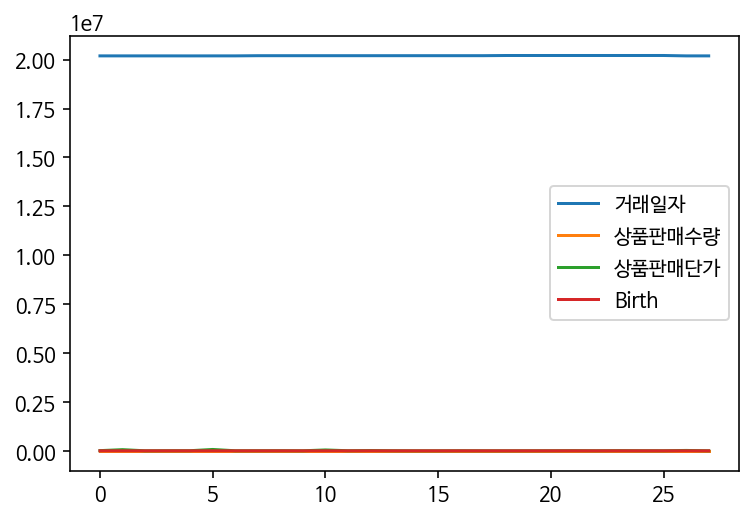

In [9]:
df.plot()

## 1. 한글 폰트 깨지는 현상 해결

### 1-1. 아래 코드를 실행

In [62]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

### 1-2. 상단 메뉴에서 런타임 - 런타임 다시 시작 클릭

### 1-3. 아래 코드를 다시 실행

In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

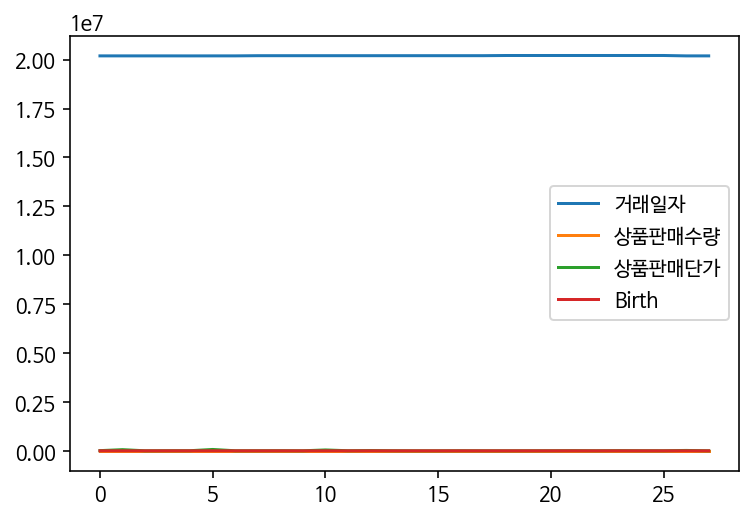

In [11]:
df.plot()
# 한글깨짐현상 수정 완료

### 2. Column 재정의

*   column 'Birth'를 '출생연도'로 변경
*   column 'Gender'를 '성별'로 변경

In [12]:
df = df.rename(columns={'Birth': '출생연도'})

In [13]:
df = df.rename(columns={'Gender': '성별'})

In [14]:
df

,거래일자,시도명,시군구명,읍면동명,상품명,온누리상품대분류카테고리명,온누리상품중분류카테고리명,온누리상품소분류카테고리명,상품판매수량,상품판매단가,출생연도,성별
0,20190718,서울,강북구,번동,아미큐파워란트제타토닉세트,NaN,NaN,미분류상품,1,10000,1950,남
1,20190807,서울,강북구,번동,아셀치온,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,베타카로틴/비타민E/셀레늄,2,60000,1980,여
2,20190905,경기,수원시 영통구,영통1동,바세린퓨어스킨젤리오리지날,퍼스널케어,바디/핸드케어,로션/크림/오일,1,2000,1970,여
3,20191002,경기,수원시 영통구,영통1동,비오킬버그프리미니,리빙,생활용품,해충·방충·모기기피제,1,6000,1990,여
4,20190130,경기,수원시 영통구,영통1동,닥터폴리Y자형가정용치실,퍼스널케어,오랄케어,치간칫솔/치실,1,7000,1980,여
5,20191112,경기,수원시 영통구,영통1동,비맥스메타정,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,종합비타민/비타민B/비타민C,1,70000,1970,남
6,20191228,경기,고양시 덕양구,화정동,가그린후레수민트스프레이,NaN,NaN,미분류상품,1,3500,1980,남
7,20200220,경기,수원시 영통구,영통1동,핑크퐁입체방한대(아동용),헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,마스크,1,5000,1980,남
8,20200227,서울,동작구,사당1동,하이맘밴드(대형),NaN,NaN,미분류상품,3,7000,1980,여
9,20200303,경기,수원시 영통구,영통1동,삼현코튼볼액,헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,소독용품,1,2500,1980,여


### 3. Data Overview

In [17]:
df.info()
# 빈 값과 데이터 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   거래일자           28 non-null     int64 
 1   시도명            28 non-null     object
 2   시군구명           28 non-null     object
 3   읍면동명           28 non-null     object
 4   상품명            28 non-null     object
 5   온누리상품대분류카테고리명  23 non-null     object
 6   온누리상품중분류카테고리명  23 non-null     object
 7   온누리상품소분류카테고리명  28 non-null     object
 8   상품판매수량         28 non-null     int64 
 9   상품판매단가         28 non-null     int64 
 10  출생연도           28 non-null     int64 
 11  성별             28 non-null     object
dtypes: int64(4), object(8)
memory usage: 2.8+ KB


In [83]:
df.describe()
# 통계값 확인하기

,거래일자,상품판매수량,상품판매단가,출생연도
count,2.800000e+01,28.000000,28.000000,28.000000
mean,2.020027e+07,1.178571,11307.142857,1976.428571
std,7.791204e+03,0.475595,17446.785304,8.698355
min,2.019013e+07,1.000000,1000.000000,1950.000000
25%,2.019108e+07,1.000000,2875.000000,1970.000000
50%,2.020053e+07,1.000000,5000.000000,1980.000000
75%,2.021016e+07,1.000000,9250.000000,1980.000000
max,2.021092e+07,3.000000,70000.000000,1990.000000


In [84]:
df.shape

(28, 12)

### 4. Data를 성별, 출생연도 기준으로 정렬

In [24]:
df.sort_values(by = ['성별', '출생연도'])
# 기준 : 오름차순

,거래일자,시도명,시군구명,읍면동명,상품명,온누리상품대분류카테고리명,온누리상품중분류카테고리명,온누리상품소분류카테고리명,상품판매수량,상품판매단가,출생연도,성별
0,20190718,서울,강북구,번동,아미큐파워란트제타토닉세트,NaN,NaN,미분류상품,1,10000,1950,남
17,20201218,경기,수원시 영통구,영통1동,그린에탄올,헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,소독용품,1,2000,1960,남
27,20190618,경기,수원시 영통구,영통1동,삼현코튼볼액,헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,소독용품,1,2500,1960,남
5,20191112,경기,수원시 영통구,영통1동,비맥스메타정,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,종합비타민/비타민B/비타민C,1,70000,1970,남
13,20200722,경기,수원시 영통구,영통1동,동아박카스D,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,종합비타민/비타민B/비타민C,1,5000,1970,남
18,20210106,경기,수원시 영통구,영통1동,하이가드마스크KF94,헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,마스크,2,1300,1970,남
6,20191228,경기,고양시 덕양구,화정동,가그린후레수민트스프레이,NaN,NaN,미분류상품,1,3500,1980,남
7,20200220,경기,수원시 영통구,영통1동,핑크퐁입체방한대(아동용),헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,마스크,1,5000,1980,남
11,20200525,경기,수원시 영통구,영통1동,레모나산,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,종합비타민/비타민B/비타민C,1,5000,1980,남
15,20200829,경기,수원시 영통구,영통1동,국대마스크중형,NaN,NaN,미분류상품,2,1300,1980,남


### 5. '온누리상품 소분류 카테고리명'에 따른 상품판매수량 조사
- 이유 : 중분류, 대분류에 NaN 값이 있기 때문

### 5-1. 성별/연령별 구분 없이 전체 판매수량으로 조사

In [25]:
df['온누리상품소분류카테고리명'].value_counts()

미분류상품              5
소독용품               4
종합비타민/비타민B/비타민C    3
마스크                2
상처드레싱·밴드           2
해충·방충·모기기피제        2
생리대                1
습진·피부염             1
치간칫솔/치실            1
소화                 1
임산부영양              1
관절보호대              1
음료·차·즙             1
베타카로틴/비타민E/셀레늄     1
포진                 1
로션/크림/오일           1
Name: 온누리상품소분류카테고리명, dtype: int64

#### 온라인상품 '소분류' 카테고리명에 따르면, 전체 판매수량 28개 가운데  
#### 가장 많이 팔린 상품은 '소독용품'이며, 그 판매수량은 4개이다.
#### (미분류상품 5개 제외)

### 5-2. 성별/연령별 구분을 적용하여 상품 판매수량 조사

In [28]:
# 5-2-1. 출생연도에 따른 상품 판매수량
df.groupby('출생연도')['온누리상품소분류카테고리명'].count()

출생연도
1950     1
1960     2
1970     5
1980    18
1990     2
Name: 온누리상품소분류카테고리명, dtype: int64

### 출생연도 기준의 조사 결과에 따르면,
### 전체 판매수량 28개 가운데 18개(약 64.3%)가 1980년대 출생자들에게 판매되었으며,
### 이에 따라 1980년대 출생자들이 상품을 가장 많이 구매했음을 알 수 있다.

In [29]:
# 5-2-2. 성별에 따른 상품 판매수량
df.groupby('성별')['온누리상품소분류카테고리명'].count()

성별
남    12
여    16
Name: 온누리상품소분류카테고리명, dtype: int64

### 성별 기준의 조사 결과에 따르면,
### 남성이 12개를 구매했고, 여성이 16개를 구매하면서
### 여성이 남성보다 더욱 많이 구매했음을 알 수 있다.

### 6. 성별 상품 선호도

In [37]:
pd.pivot_table(df, index='성별', columns='온누리상품소분류카테고리명', values='상품판매수량', aggfunc='count')

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
성별,,,,,,,,,,,,,,,,
남,NaN,NaN,2.0,3.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,1.0
여,1.0,1.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0


In [38]:
df2 = pd.pivot_table(df, index='성별', columns='온누리상품소분류카테고리명', values='상품판매수량', aggfunc='count')

In [39]:
df2

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
성별,,,,,,,,,,,,,,,,
남,NaN,NaN,2.0,3.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,1.0
여,1.0,1.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0


In [40]:
df2.fillna(0)
# NaN 대신 0을 입력

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
성별,,,,,,,,,,,,,,,,
남,0.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0
여,1.0,1.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


### 성별 판매수량 조사 결과에 따르면,
### 남성은 '종합비타민/비타민B/비타민C' 상품을 각각 3회씩 가장 많이 구매했으며,
### 여성은 '상처드레싱밴드'와 '소독용품'을 각각 2회씩 가장 많이 구매하였다.

### 7. 연령별 상품 선호도

In [41]:
pd.pivot_table(df, index='출생연도', columns='온누리상품소분류카테고리명', values='상품판매수량', aggfunc='count')

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
출생연도,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1980,1.0,NaN,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [45]:
df3 = pd.pivot_table(df, index='출생연도', columns='온누리상품소분류카테고리명', values='상품판매수량', aggfunc='count')

In [46]:
df3

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
출생연도,,,,,,,,,,,,,,,,
1950,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1980,1.0,NaN,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [47]:
df3.fillna(0)
# NaN 대신 0을 입력

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
출생연도,,,,,,,,,,,,,,,,
1950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
1980,1.0,0.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 출생연도별 판매수량 조사 결과에 따르면,
### 1950년대 출생자들은 1개의 상품을 구매했지만 '미분류상품'에 해당하고, 
### 1960년대 출생자들은 '소독용품'을 가장 많이 구매했고(2개),
### 1970년대 출생자들은 '종합비타민/비타민B/비타민C' 제품을 가장 많이 구매했고(2개),
### 1980년대 출생자들은 '상처드레싱밴드', '소독용품' 제품을 가장 많이 구매했고(각 2개),
### 1990년대 출생자들은 '임산부영양', '해충.방충.모기기피제'를 가장 많이 구매했다.(각 1개)

### 8. 분석 내용 시각화

In [49]:
df2 = df2.fillna(0)

In [50]:
df2

온누리상품소분류카테고리명,관절보호대,로션/크림/오일,마스크,미분류상품,베타카로틴/비타민E/셀레늄,상처드레싱·밴드,생리대,소독용품,소화,습진·피부염,음료·차·즙,임산부영양,종합비타민/비타민B/비타민C,치간칫솔/치실,포진,해충·방충·모기기피제
성별,,,,,,,,,,,,,,,,
남,0.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0
여,1.0,1.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [72]:
df

,거래일자,시도명,시군구명,읍면동명,상품명,온누리상품대분류카테고리명,온누리상품중분류카테고리명,온누리상품소분류카테고리명,상품판매수량,상품판매단가,출생연도,성별
0,20190718,서울,강북구,번동,아미큐파워란트제타토닉세트,NaN,NaN,미분류상품,1,10000,1950,남
1,20190807,서울,강북구,번동,아셀치온,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,베타카로틴/비타민E/셀레늄,2,60000,1980,여
2,20190905,경기,수원시 영통구,영통1동,바세린퓨어스킨젤리오리지날,퍼스널케어,바디/핸드케어,로션/크림/오일,1,2000,1970,여
3,20191002,경기,수원시 영통구,영통1동,비오킬버그프리미니,리빙,생활용품,해충·방충·모기기피제,1,6000,1990,여
4,20190130,경기,수원시 영통구,영통1동,닥터폴리Y자형가정용치실,퍼스널케어,오랄케어,치간칫솔/치실,1,7000,1980,여
5,20191112,경기,수원시 영통구,영통1동,비맥스메타정,헬스(일부 카테고리에 일반의약품 포함),피로/건강증진,종합비타민/비타민B/비타민C,1,70000,1970,남
6,20191228,경기,고양시 덕양구,화정동,가그린후레수민트스프레이,NaN,NaN,미분류상품,1,3500,1980,남
7,20200220,경기,수원시 영통구,영통1동,핑크퐁입체방한대(아동용),헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,마스크,1,5000,1980,남
8,20200227,서울,동작구,사당1동,하이맘밴드(대형),NaN,NaN,미분류상품,3,7000,1980,여
9,20200303,경기,수원시 영통구,영통1동,삼현코튼볼액,헬스(일부 카테고리에 일반의약품 포함),응급·구급처치,소독용품,1,2500,1980,여


In [75]:
import seaborn as sns


In [76]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

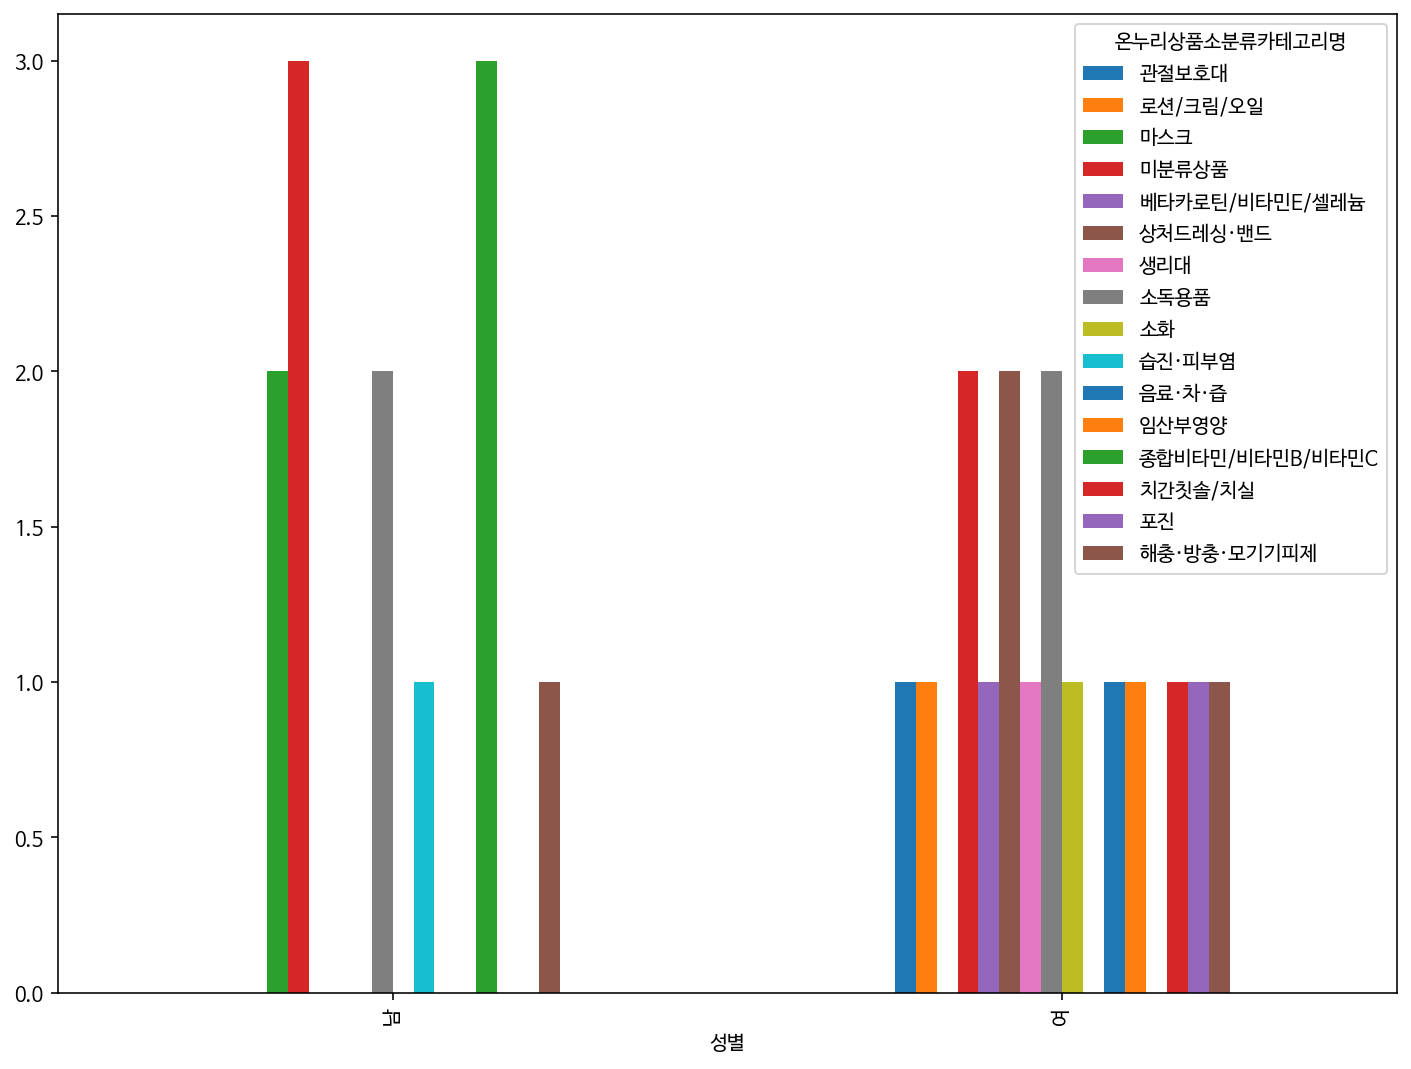

In [91]:
df2.plot(kind='bar')
plt.show()